# Sprint 06

Importamos librerías y leemos el csv.

In [63]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

data = pd.read_csv('bank_dataset.csv')

Transformamos los valores nulos con la media en el caso de columnas numéricas y con la moda en caso de columnas categóricas

In [64]:
# Preguntar
print("Tenemos valores nulos?")
print(data.isna().sum())

# Solucionar
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  #columna numérica
        media = data[column].mean()  #media
        data[column] = data[column].fillna(media)  #reemplazar
    else:  #categórica
        moda = data[column].mode().iloc[0]  #moda
        data[column] = data[column].fillna(moda)  #reemplazar

# Confirmar
print("\nTenemos valores nulos?")
print(data.isna().sum())

Tenemos valores nulos?
age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Tenemos valores nulos?
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


## Análisis exploratorio EDA

In [28]:
# Primeras filas
print("Primeras filas")
print(data.head())
# Info
print("Info")
print(data.info())
# Resumen estadístico
print("Resumen estadístico")
print(data.describe())
print("Valores únicos por columna")
print(data.nunique())

Primeras filas
    age         job  marital  education default  balance housing loan  \
0  59.0      admin.  married  secondary      no     2343     yes   no   
1  56.0      admin.  married  secondary      no       45      no   no   
2  41.0  technician  married  secondary      no     1270     yes   no   
3  55.0    services  married  secondary      no     2476     yes   no   
4  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 111

Eliminamos la variable 'pdays', ya que al menos el 50% de los valores es '-1', que podría considerarse como un valor nulo.

Distribución de job:
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64




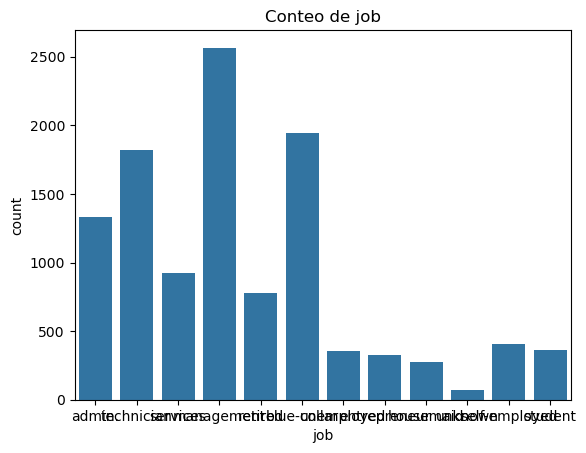

Distribución de marital:
marital
married     0.569253
single      0.315087
divorced    0.115660
Name: proportion, dtype: float64




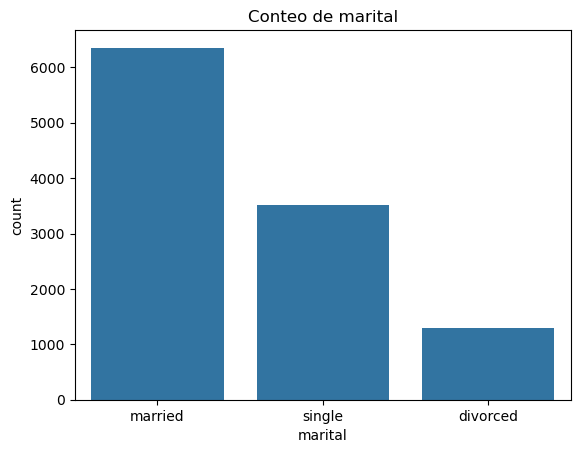

Distribución de education:
education
secondary    0.491041
tertiary     0.330138
primary      0.134385
unknown      0.044436
Name: proportion, dtype: float64




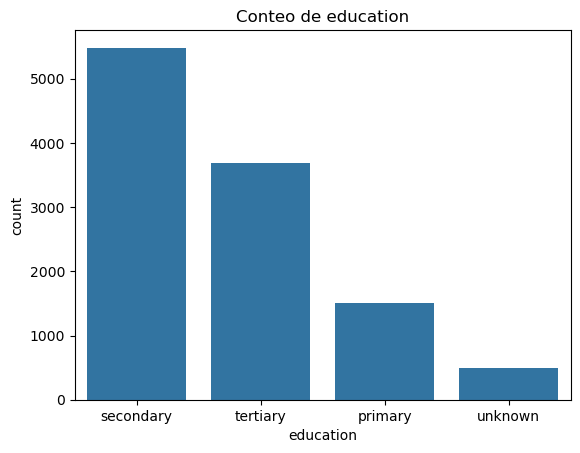

Distribución de default:
default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64




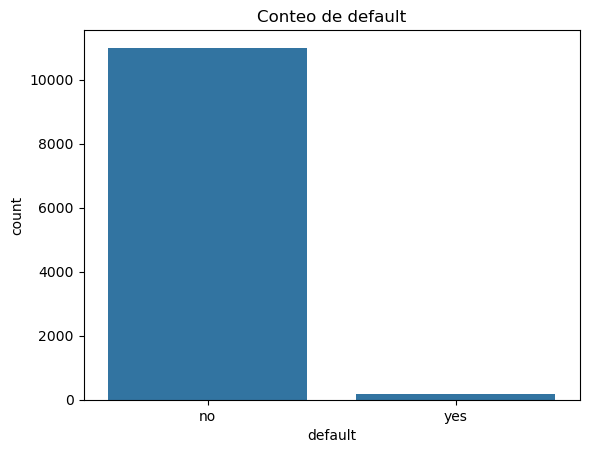

Distribución de housing:
housing
no     0.526877
yes    0.473123
Name: proportion, dtype: float64




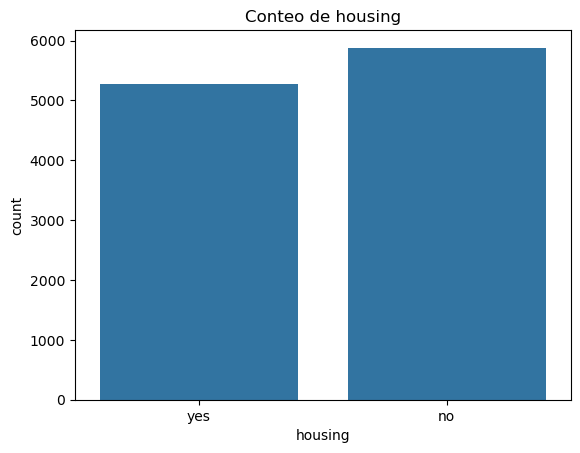

Distribución de loan:
loan
no     0.869199
yes    0.130801
Name: proportion, dtype: float64




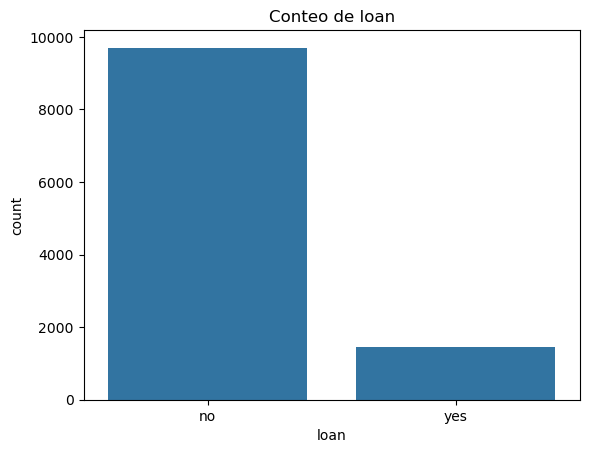

Distribución de contact:
contact
cellular     0.720480
unknown      0.210177
telephone    0.069342
Name: proportion, dtype: float64




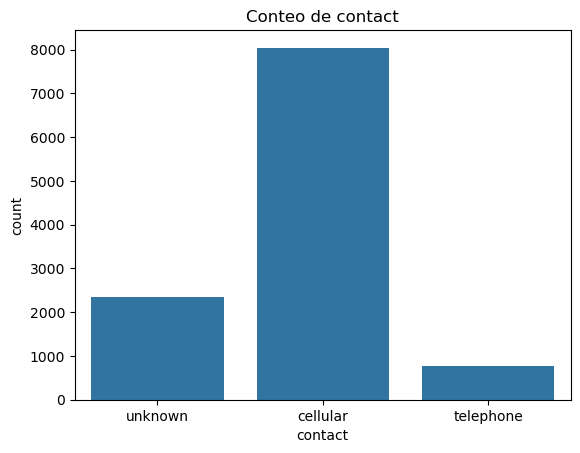

Distribución de month:
month
may    0.253001
aug    0.136087
jul    0.135639
jun    0.109479
nov    0.084483
apr    0.082691
feb    0.069522
oct    0.035119
jan    0.030819
sep    0.028579
mar    0.024727
dec    0.009855
Name: proportion, dtype: float64




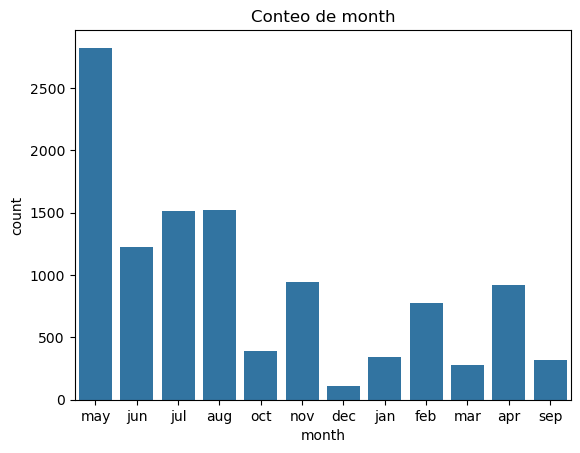

Distribución de poutcome:
poutcome
unknown    0.745924
failure    0.110016
success    0.095951
other      0.048110
Name: proportion, dtype: float64




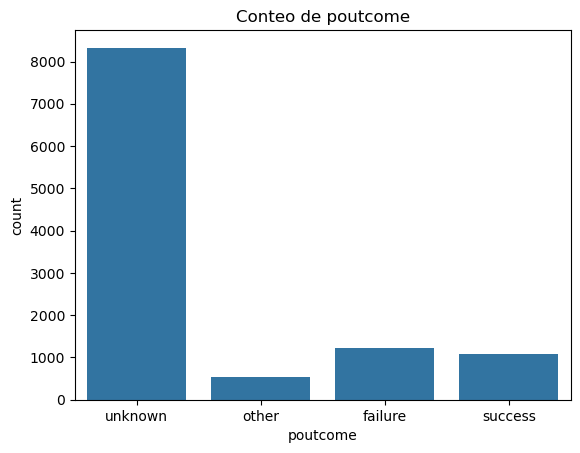

Distribución de deposit:
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64




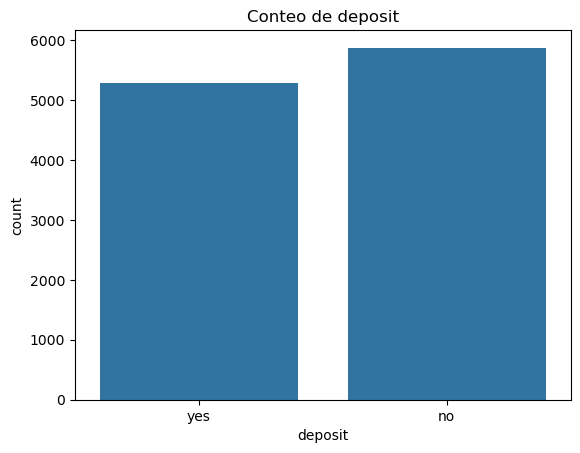

In [4]:
# Conteo de valores únicos por variable categórica
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Distribución de {col}:")
    print(data[col].value_counts(normalize=True))
    print("\n")

    # Gráfico de barras
    sns.countplot(x=col, data=data)
    plt.title(f"Conteo de {col}")
    plt.show()

Eliminaremos las variables:
- 'poutcome', por tener una gran cantidad de valores 'unknown'
- 'default' y 'loan', ya que el 98.5% de los valores son "no", mientras que solo el 1.5% son "yes" en el caso de 'default'. Esto significa que la variable tiene muy poca variabilidad y, por lo tanto, es poco probable que contribuya significativamente al modelo o análisis.

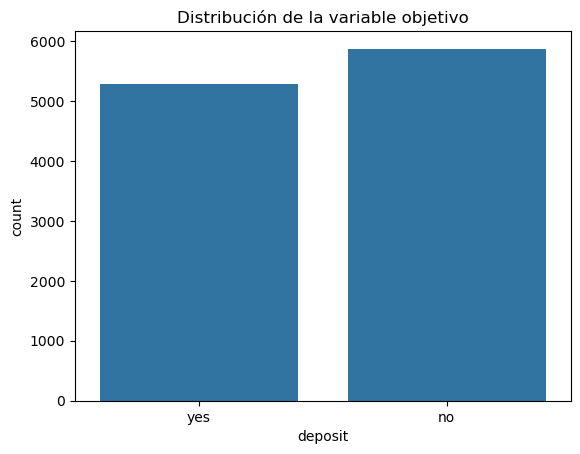

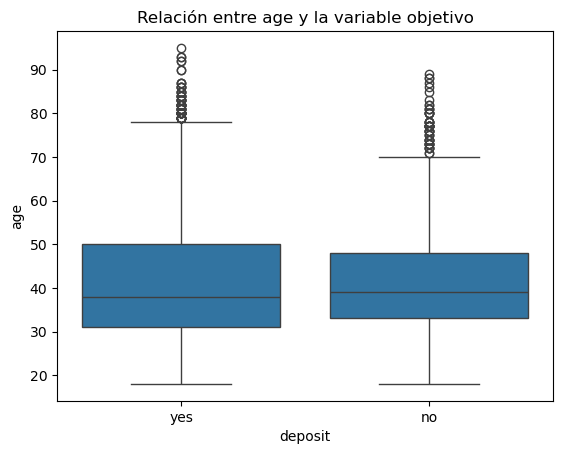

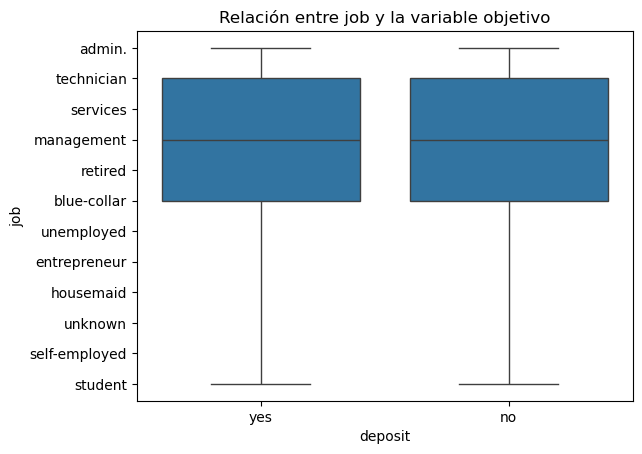

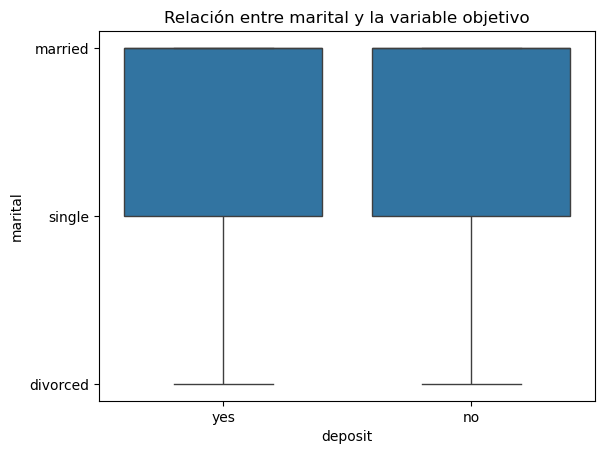

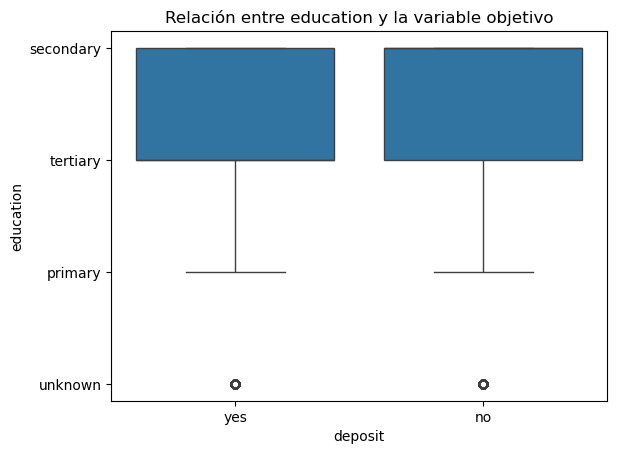

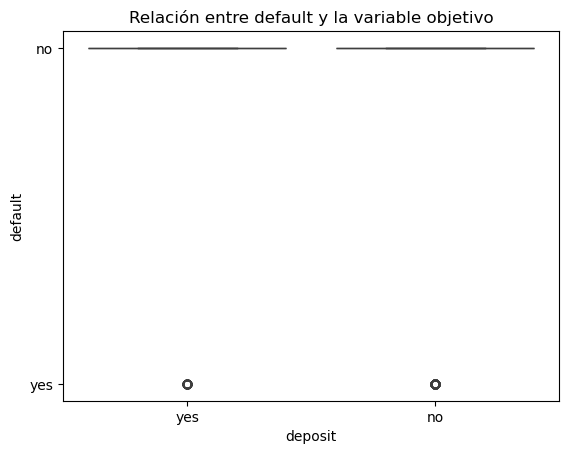

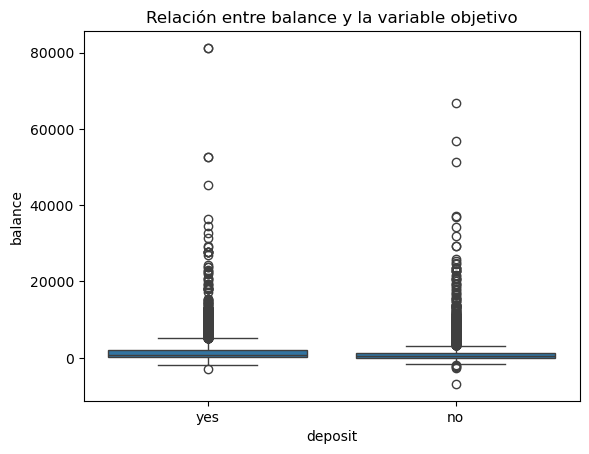

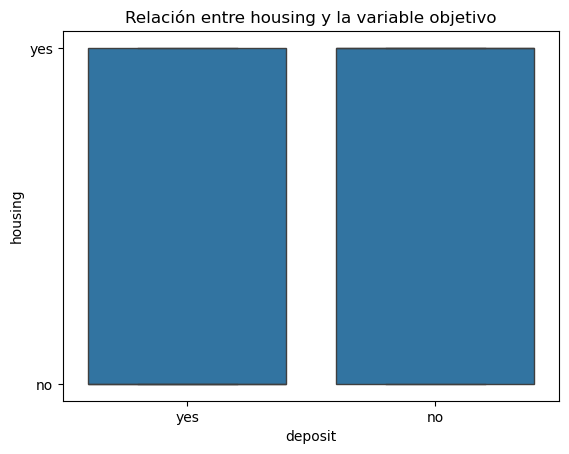

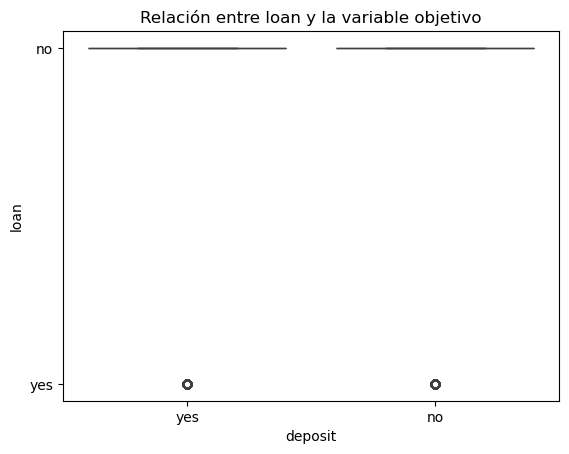

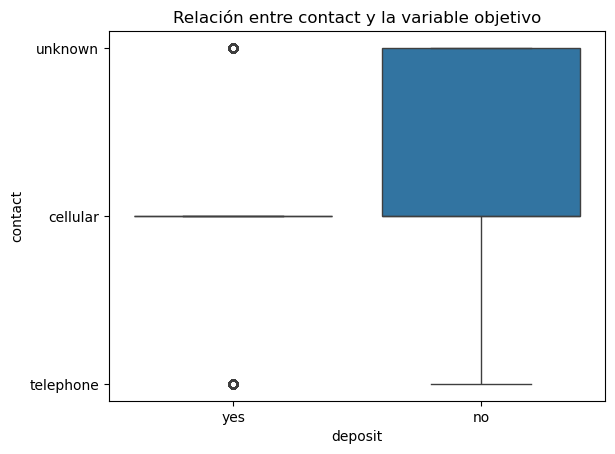

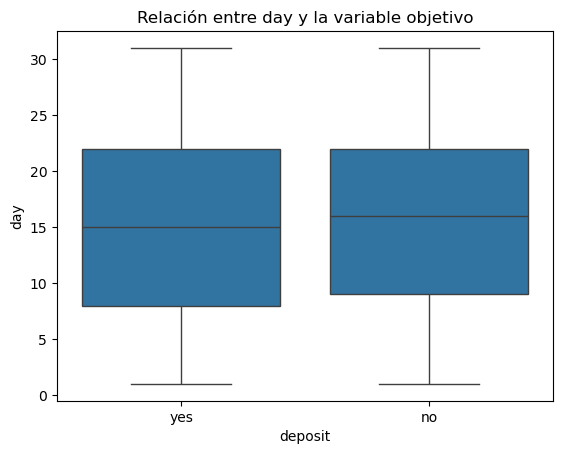

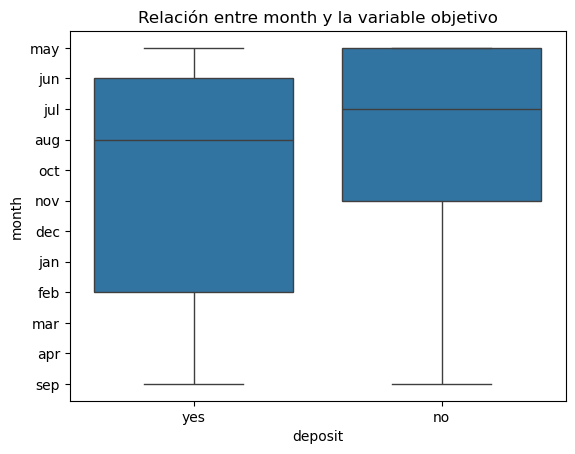

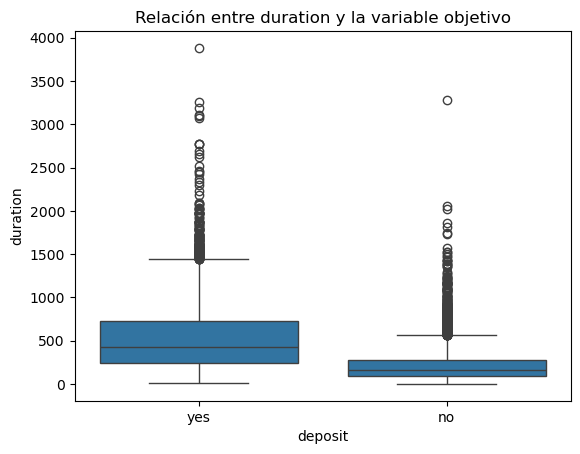

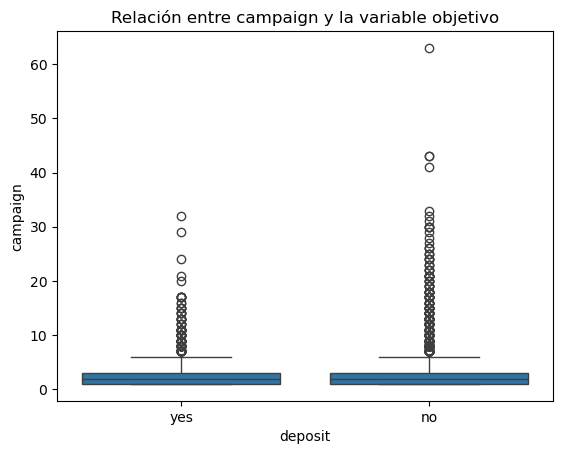

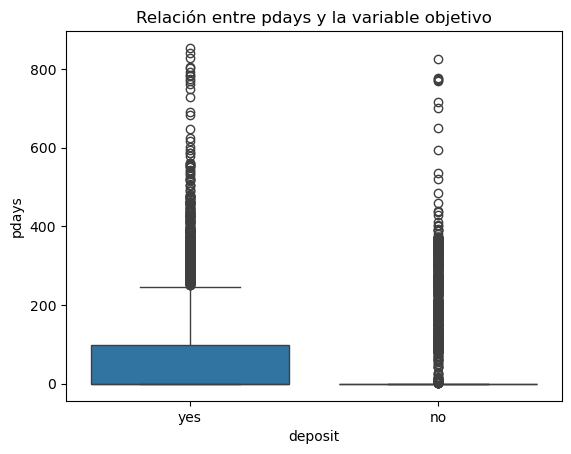

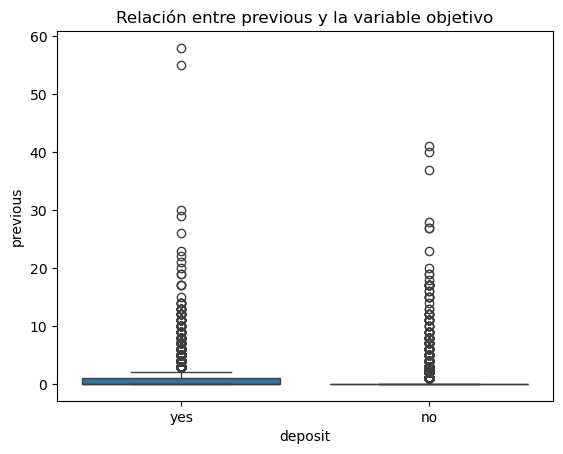

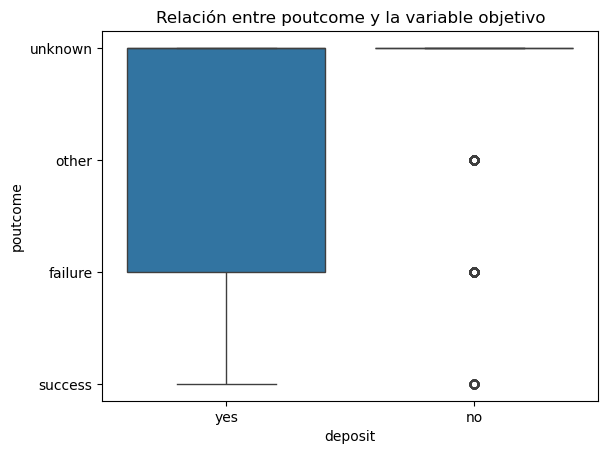

In [5]:
# Distribución de la variable objetivo
sns.countplot(x='deposit', data=data)
plt.title("Distribución de la variable objetivo")
plt.show()

# Relación entre la variable objetivo y otras
for column in data.columns:
    if column != 'deposit':  # Excluir la variable objetivo
        sns.boxplot(x='deposit', y=column, data=data)
        plt.title(f"Relación entre {column} y la variable objetivo")
        plt.show()


In [65]:
# Eliminar columnas
columns_to_drop = ['pdays', 'poutcome', 'default', 'loan'] 
data_cleaned = data.drop(columns=columns_to_drop)

print("Primeras filas")
print(data_cleaned.head())

Primeras filas
    age         job  marital  education  balance housing  contact  day month  \
0  59.0      admin.  married  secondary     2343     yes  unknown    5   may   
1  56.0      admin.  married  secondary       45      no  unknown    5   may   
2  41.0  technician  married  secondary     1270     yes  unknown    5   may   
3  55.0    services  married  secondary     2476     yes  unknown    5   may   
4  54.0      admin.  married   tertiary      184      no  unknown    5   may   

   duration  campaign  previous deposit  
0      1042         1         0     yes  
1      1467         1         0     yes  
2      1389         1         0     yes  
3       579         1         0     yes  
4       673         2         0     yes  


Quedan 13 variables, pero como las variables categóricas deben codificarse generando matrices, el resultado final sería mucho más grande
Además, es muy poco probable que day y month tengan un impacto potencialmente alto, a menos que haya un patrón estacional claro.

In [66]:
# Eliminar columnas
columns_to_drop = ['month', 'day'] 
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

print("Primeras filas")
print(data_cleaned.head())

Primeras filas
    age         job  marital  education  balance housing  contact  duration  \
0  59.0      admin.  married  secondary     2343     yes  unknown      1042   
1  56.0      admin.  married  secondary       45      no  unknown      1467   
2  41.0  technician  married  secondary     1270     yes  unknown      1389   
3  55.0    services  married  secondary     2476     yes  unknown       579   
4  54.0      admin.  married   tertiary      184      no  unknown       673   

   campaign  previous deposit  
0         1         0     yes  
1         1         0     yes  
2         1         0     yes  
3         1         0     yes  
4         2         0     yes  


Y también eliminaremos las variables "age" y "housing", porue no parece tener una relación fuerte con la variable objetivo deposit, ya que no hay una separación clara entre las categorías yes y no.

In [67]:
# Eliminar columnas
columns_to_drop = ['age', 'housing'] 
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

print("Primeras filas")
print(data_cleaned.head())

Primeras filas
          job  marital  education  balance  contact  duration  campaign  \
0      admin.  married  secondary     2343  unknown      1042         1   
1      admin.  married  secondary       45  unknown      1467         1   
2  technician  married  secondary     1270  unknown      1389         1   
3    services  married  secondary     2476  unknown       579         1   
4      admin.  married   tertiary      184  unknown       673         2   

   previous deposit  
0         0     yes  
1         0     yes  
2         0     yes  
3         0     yes  
4         0     yes  


## División del modelo

Dividir el conjunto de datos
Utilizaremos un 80% de los datos para entrenar nuestro modelo. Se necesita una gran cantidad de datos para entrenar el modelo, ya que tiene que relacionar variables y aprender patrones. Cuanto mayor número de datos proporcionemos, mejor será el modelo (siempre y cuando no haya overfitting).

Por otro lado, utilizaremos el 20% de los datos para testear el modelo. Es fundamental no utilizar estos datos para entrenar el modelo para ver si nuestro algoritmo tiene un buen deswempeño en datos no entrenados.

Es imprescindible la estratificación de la variable objetivo para que se mantenta igual en el conunto de entrenamiento que en el de prueba. Si no, podríamos tener un conunto de datos en los que las proporcionesde clases son diferentes.

In [68]:
X = data_cleaned.drop(columns='deposit')  # Variables
y = data_cleaned['deposit']               # Objetivo

# Partición estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar las proporciones en train y test
print("Proporciones en y_train:")
print(y_train.value_counts(normalize=True))

print("Proporciones en y_test:")
print(y_test.value_counts(normalize=True))

Proporciones en y_train:
deposit
no     0.526151
yes    0.473849
Name: proportion, dtype: float64
Proporciones en y_test:
deposit
no     0.526198
yes    0.473802
Name: proportion, dtype: float64


## Codificar variables categóricas
Como no podemos utilizar variables categóricas con texto, tenemos que codificarlas. Podemos clasificar nuestras variables categóricas como:
1. Ordinales: tienen un orden narutal (una jerarquía) --> Usamos label encoding
2. Nominales: no tienen orden natural y no se interpretan como valores numéricos --> Usamos one hot encoding
3. Booleanas: son de 'sí' o 'no' --> Usamos label encoding

#### Categóricas ordinales
Para las variables categóricas ordinales, como "education", podemos asignar un número a cada categoria.
Podemos utilizar LabelEncoder.

In [69]:
label_encoder = LabelEncoder()
education_encoded = label_encoder.fit_transform(X_train['education'])
print(education_encoded)

[1 2 1 ... 1 1 1]


#### Categóricas nominales
Por otro lado, tenemos variables categóricas nominales, como el tipo de trabajo, para lo que vamos a utilizar el One-hot encoding.
Recuerda que hemos eliminado 'pdays', 'poutcome', 'default', 'loan'.
Para la categoría job agruparemos en función de la educación necesaria para desempeñar el trabajo:
- Alta calificación: management, self-employed, entrepreneur
- Media calificación: admin., services, blue-collar
- Baja calificación: housemaid, student, retired

In [70]:
# Verificar valores originales antes del mapeo
print("Valores originales:", X_train['job'].unique())

# Limpiar la columna eliminando puntos y normalizando el formato
X_train['job'] = X_train['job'].str.strip().str.title().replace({'Admin.': 'Admin'})

# Diccionario con las claves ajustadas
job_to_qualification = {
    'Admin': 'Medium',
    'Blue-Collar': 'Medium',
    'Entrepreneur': 'High',
    'Housemaid': 'Low',
    'Management': 'High',
    'Retired': 'Low',
    'Self-Employed': 'High',
    'Services': 'Medium',
    'Student': 'Low',
    'Technician': 'High',
    'Unknown': 'Low',    
    'Unemployed': 'Low'
}

# Aplicar el mapeo
X_train['job'] = X_train['job'].map(lambda x: job_to_qualification.get(x, 'Medium'))

# Verificar después del mapeo
print("Valores mapeados:", X_train['job'].head())

Valores originales: ['admin.' 'technician' 'blue-collar' 'services' 'housemaid' 'management'
 'self-employed' 'retired' 'unknown' 'student' 'unemployed' 'entrepreneur']
Valores mapeados: 8644    Medium
2632    Medium
3056      High
1080      High
4006    Medium
Name: job, dtype: object


In [71]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Usar sparse_output=False para obtener una matriz densa
job_encoded = encoder.fit_transform(X_train[['job']])
job_encoded_df = pd.DataFrame(job_encoded, columns=encoder.get_feature_names_out(['job']))
marital_encoded = encoder.fit_transform(X_train[['marital']])
marital_encoded_df = pd.DataFrame(marital_encoded, columns=encoder.get_feature_names_out(['marital']))
contact_encoded = encoder.fit_transform(X_train[['contact']])
contact_encoded_df = pd.DataFrame(contact_encoded, columns=encoder.get_feature_names_out(['contact']))

#### Variable objetivo

In [72]:
# Variable objetivo codificada
deposit_encoded = y_train.map({'yes': 1, 'no': 0})
print(deposit_encoded)

8644    0
2632    1
3056    1
1080    1
4006    1
       ..
3751    1
9695    0
3579    1
3386    1
9743    0
Name: deposit, Length: 8929, dtype: int64


## Estandarización
Las variables numéricas pueden tener escalas muy diferentes (por ejemplo, ingresos en miles). La estandarización asegura que todas las variables numéricas tengan una escala similar, generalmente con media de 0 y desviación estándar de 1. 
Además, muchos algoritmos pueden ser sensibles a las escalas de las variables.

In [73]:
from sklearn.preprocessing import StandardScaler
# Selección
numeric_columns = ['balance', 'duration', 'campaign']

scaler = StandardScaler() #creamos objeto
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns]) #tranformamos
print(X_train.head())

         job  marital  education   balance   contact  duration  campaign  \
8644  Medium  married  secondary -0.321431  cellular -0.343988  0.178481   
2632  Medium  married   tertiary  0.359538  cellular -0.317972 -0.540031   
3056    High   single  secondary -0.451508  cellular -0.485632 -0.540031   
1080    High  married  secondary  0.606919  cellular  1.170736  0.178481   
4006  Medium   single    unknown -0.425291  cellular -0.283283 -0.180775   

      previous  
8644         0  
2632         8  
3056         1  
1080         0  
4006         0  


## Matriz de correlación

In [74]:
df_nominal = pd.concat([job_encoded_df, marital_encoded_df, contact_encoded_df], axis=1)

if isinstance(education_encoded, (list, np.ndarray)):
    education_encoded = pd.DataFrame(education_encoded, columns=['education_encoded'])
df_ordinal = pd.concat([education_encoded], axis = 1)

numeric_columns = ['balance', 'duration', 'campaign', 'previous']
df_numeric = X_train[numeric_columns] 

# Índices están alineados
df_nominal = df_nominal.reset_index(drop=True)
df_ordinal = df_ordinal.reset_index(drop=True)
df_numeric = df_numeric.reset_index(drop=True)

# Combinar todos los DataFrames
df_final = pd.concat([df_nominal, df_ordinal, df_numeric], axis=1)

df_final.dropna(inplace=True)

# Exportar a un archivo CSV
df_final.to_csv("train_encoded.csv", index=False)

print("Archivo CSV creado con éxito: train_encoded.csv")
train_encoded = pd.read_csv('train_encoded.csv')
print(train_encoded.head())

Archivo CSV creado con éxito: train_encoded.csv
   job_High  job_Low  job_Medium  marital_divorced  marital_married  \
0       0.0      0.0         1.0               0.0              1.0   
1       0.0      0.0         1.0               0.0              1.0   
2       1.0      0.0         0.0               0.0              0.0   
3       1.0      0.0         0.0               0.0              1.0   
4       0.0      0.0         1.0               0.0              0.0   

   marital_single  contact_cellular  contact_telephone  contact_unknown  \
0             0.0               1.0                0.0              0.0   
1             0.0               1.0                0.0              0.0   
2             1.0               1.0                0.0              0.0   
3             0.0               1.0                0.0              0.0   
4             1.0               1.0                0.0              0.0   

   education_encoded   balance  duration  campaign  previous  
0          

deposit              1.000000
job_Medium           0.009817
job_Low              0.009341
contact_telephone    0.009197
marital_married      0.005837
balance              0.004875
campaign             0.001884
previous             0.000910
contact_cellular    -0.000093
marital_divorced    -0.002913
marital_single      -0.004227
education_encoded   -0.005047
contact_unknown     -0.005603
duration            -0.007015
job_High            -0.016425
Name: deposit, dtype: float64


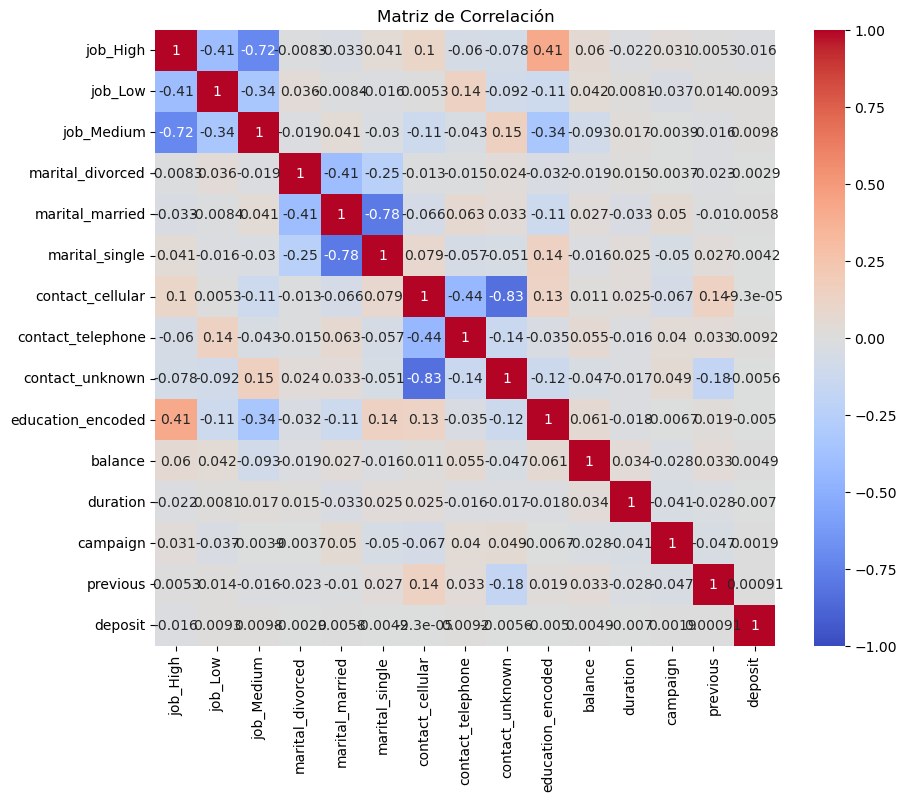

In [77]:
# Unomos en un df todo
df_correlation = pd.concat([df_final, deposit_encoded], axis=1)
# Como tenemos muchas variables, el heatmap filtra columnas con una alta correlación con deposit_encoded
target_corr = correlation['deposit'].sort_values(ascending=False)
print(target_corr)

correlation = df_correlation.corr()

# Visualitzar la matriu de correlació amb un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()

Al observar la matriz de correlación, parece que ninguna de las variables tiene una correlación significativa con la variable objetivo deposit. 

La correlación más alta (en valor absoluto) con deposit es cercana a cero, lo que sugiere una baja relación lineal.

La correlación de Pearson (por defecto) mide relaciones lineales, pero puede ser que las relaciones entre las variables y el objetivo sean no lineales.


In [78]:
correlation_spearman = df_correlation.corr(method='spearman')
target_corr_spearman = correlation_spearman['deposit'].sort_values(ascending=False)
print(target_corr_spearman)

df_final.describe()

deposit              1.000000
balance              0.015480
job_Medium           0.009817
job_Low              0.009341
contact_telephone    0.009197
marital_married      0.005837
campaign             0.002927
contact_cellular    -0.000093
marital_divorced    -0.002913
marital_single      -0.004227
education_encoded   -0.005424
contact_unknown     -0.005603
previous            -0.013676
job_High            -0.016425
duration            -0.023267
Name: deposit, dtype: float64


,job_High,job_Low,job_Medium,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education_encoded,balance,duration,campaign,previous
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8.929000e+03,8.929000e+03,8.929000e+03,8929.000000
mean,0.461754,0.164408,0.373838,0.114906,0.565237,0.319857,0.720797,0.069101,0.210102,1.288834,-6.366157e-18,1.193655e-17,-7.321081e-17,0.829768
std,0.498563,0.370666,0.483849,0.318927,0.495754,0.466447,0.448632,0.253639,0.407404,0.752988,1.000056e+00,1.000056e+00,1.000056e+00,2.331394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.799611e+00,-1.063771e+00,-5.400311e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.572221e-01,-6.735271e-01,-5.400311e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-3.126924e-01,-3.382065e-01,-1.807748e-01,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,7.115141e-02,3.526697e-01,1.784814e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.679569e+01,8.423490e+00,2.173386e+01,58.000000


Hemos realizado una correlación no lineal y tampoco parece que la variable deposit tenga ninguna relación fuerte con el resto de variables.

## PCA
Como no hemos encontrado relaciones lineales y no lineales en train, vamos a probar un PCA para ver si algunas variables tienen baja o nula relevancia.

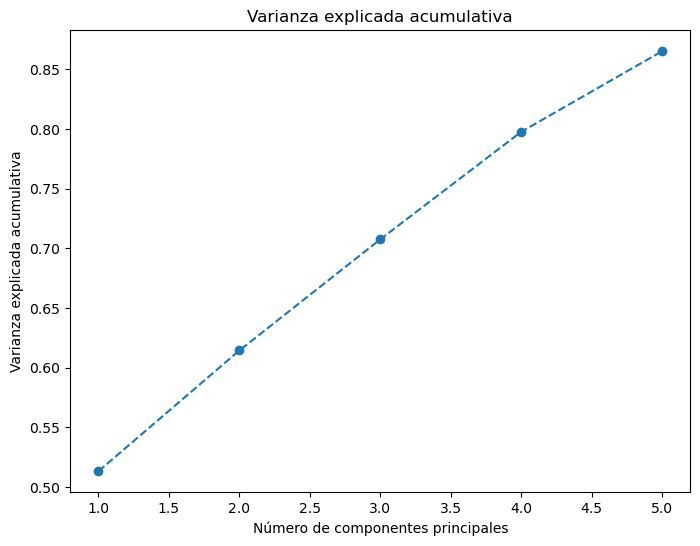

In [82]:
from sklearn.feature_selection import SelectPercentile, f_classif

pca_components = pd.DataFrame(pca.components_, columns=df_final.columns)

# Gráfico de varianza
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

Según el gráfico, 4 componentes explicarían el 80% de la variancia de los datos.

Si quisiéramos, podríamos añadir un quinto componente para explicar aún más la varianza (87%).

## Aplicamos a test

In [57]:
# Categórica ordinal
label_encoder = LabelEncoder()
education_encoded = label_encoder.fit_transform(X_test['education'])

# Agrupar trabao
X_test['job'] = X_test['job'].str.strip().str.title().replace({'Admin.': 'Admin'})
X_test['job'] = X_test['job'].map(job_to_qualification)

encoder = OneHotEncoder(sparse_output=False)  # Usar sparse_output=False para obtener una matriz densa
job_encoded = encoder.fit_transform(X_test[['job']])
job_encoded_df = pd.DataFrame(job_encoded, columns=encoder.get_feature_names_out(['job']))
marital_encoded = encoder.fit_transform(X_test[['marital']])
marital_encoded_df = pd.DataFrame(marital_encoded, columns=encoder.get_feature_names_out(['marital']))
contact_encoded = encoder.fit_transform(X_test[['contact']])
contact_encoded_df = pd.DataFrame(contact_encoded, columns=encoder.get_feature_names_out(['contact']))


# Variable objetivo codificada
deposit_encoded_test = y_test.map({'yes': 1, 'no': 0})


df_nominal = pd.concat([job_encoded_df, marital_encoded_df, contact_encoded_df], axis=1)

if isinstance(education_encoded, (list, np.ndarray)):
    education_encoded = pd.DataFrame(education_encoded, columns=['education_encoded'])
df_ordinal = pd.concat([education_encoded], axis = 1)

numeric_columns = ['balance', 'duration', 'campaign', 'previous']
df_numeric = X_test[numeric_columns] 

# Índices están alineados
df_nominal = df_nominal.reset_index(drop=True)
df_ordinal = df_ordinal.reset_index(drop=True)
df_numeric = df_numeric.reset_index(drop=True)

# Combinar todos los DataFrames
df_final_test = pd.concat([df_nominal, df_ordinal, df_numeric], axis=1)

df_final_test.dropna(inplace=True)

# Estandarización
numeric_columns = ['balance', 'duration', 'campaign']
scaler = StandardScaler() #creamos objeto
df_final_test[numeric_columns] = scaler.fit_transform(df_final_test[numeric_columns]) #tranformamos

# Exportar a un archivo CSV
df_final.to_csv("test_encoded.csv", index=False)

print("Archivo CSV creado con éxito: test_encoded.csv")
test_encoded = pd.read_csv('test_encoded.csv')
print(test_encoded.head())

Archivo CSV creado con éxito: test_encoded.csv
   job_High  job_Low  job_Medium  marital_divorced  marital_married  \
0       0.0      0.0         1.0               0.0              1.0   
1       0.0      0.0         1.0               0.0              1.0   
2       1.0      0.0         0.0               0.0              0.0   
3       1.0      0.0         0.0               0.0              1.0   
4       0.0      0.0         1.0               0.0              0.0   

   marital_single  contact_cellular  contact_telephone  contact_unknown  \
0             0.0               1.0                0.0              0.0   
1             0.0               1.0                0.0              0.0   
2             1.0               1.0                0.0              0.0   
3             0.0               1.0                0.0              0.0   
4             1.0               1.0                0.0              0.0   

   education_encoded   balance  duration  campaign  previous  
0           

## Conclusión
A pesar de que en teoría no es necesario realizar un PCA porque debería tener 4 o 5 variables que explicaran la varianza de la variable objetivo, no he sido capaz de determinarlos mediante una matriz de correlación.

Por eso he realizado un PCA, que parece ser linear para los 4 primeros componentes.
